# Full Dataset

In [ ]:
df_full = pd.read_csv("/content/STRIKE_REPORTS.csv")

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287555 entries, 0 to 287554
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               287555 non-null  int64  
 1   INCIDENT_DATE          287555 non-null  object 
 2   INCIDENT_MONTH         287555 non-null  int64  
 3   INCIDENT_YEAR          287555 non-null  int64  
 4   TIME                   162421 non-null  object 
 5   TIME_OF_DAY            165716 non-null  object 
 6   AIRPORT_ID             287551 non-null  object 
 7   AIRPORT                287555 non-null  object 
 8   LATITUDE               252174 non-null  float64
 9   LONGITUDE              252173 non-null  float64
 10  RUNWAY                 217848 non-null  object 
 11  STATE                  252174 non-null  object 
 12  FAAREGION              252174 non-null  object 
 13  LOCATION               33834 non-null   object 
 14  ENROUTE_STATE          5031 non-nul

In [ ]:
indicated = df_full.INDICATED_DAMAGE
damage_level = df_full.DAMAGE_LEVEL

In [ ]:
indicated.info()

<class 'pandas.core.series.Series'>
RangeIndex: 287555 entries, 0 to 287554
Series name: INDICATED_DAMAGE
Non-Null Count   Dtype
--------------   -----
287555 non-null  bool 
dtypes: bool(1)
memory usage: 280.9 KB


In [ ]:
damage_level.info()

<class 'pandas.core.series.Series'>
RangeIndex: 287555 entries, 0 to 287554
Series name: DAMAGE_LEVEL
Non-Null Count   Dtype 
--------------   ----- 
186578 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [ ]:

res = df_full.loc[:, ['INDICATED_DAMAGE', 'DAMAGE_LEVEL']]

In [ ]:
res_group = res.groupby("INDICATED_DAMAGE").apply(lambda x: x)

In [ ]:
res_group.shape

(287555, 2)

In [ ]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == False)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
False             N               166873
                  NaN             100977
                  M?                   2
dtype: int64

In [ ]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == True)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
True              M               8571
                  M?              6789
                  S               4259
                  D                 82
                  N                  2
dtype: int64

# 2021

## Read data

In [13]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 101)
pd.set_option('float_format', '{:0.2f}'.format)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np

In [16]:
import sklearn

In [17]:
df = pd.read_excel("/content/data_2021.xlsx")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Columns: 102 entries, INDX_NR to TRANSFER
dtypes: bool(39), float64(21), int64(3), object(39)
memory usage: 8.1+ MB


Comment: There are 17,266 entries in the year 2022.     
39 columns of boolean type.   
22 columns of numeric type.    
41 columns of string type.

In [19]:
df.head(3)

,INDX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,...,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,SPECIES_ID,SPECIES,OUT_OF_RANGE_SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,BIRD_BAND_NUMBER,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTER_NAME,REPORTER_TITLE,SOURCE,PERSON,LUPDATE,IMAGE,TRANSFER
0,1183130,2021-12-31,12,2021,00:30,NaN,KGEG,SPOKANE INTERNATIONAL,47.62,-117.53,3,WA,ANM,NaN,NaN,UNK,UNKNOWN,,,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,O2111,Rock pigeon,False,Bird carcass found frozen to runway.. night. S...,True,True,NaN,Unknown,,1,Small,NaN,NaN,SI ID,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2022-01-31,False,False
1,1170465,2021-12-31,12,2021,19:45,Night,KDTW,DETROIT METRO WAYNE COUNTY ARPT,42.21,-83.35,22R,MI,AGL,NaN,NaN,DAL,DELTA AIR LINES,N379DN,913,A-321,04A,7.00,10.00,1.00,A,4.00,D,2.00,1.00,1.00,NaN,NaN,Approach,400.00,150.00,1.00,Overcast,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,None,NaN,UNKBL,Unknown bird - large,False,Unknown if the pilot reported this strike to A...,False,False,NaN,Unknown,2-10,1,Large,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2022-01-07,False,False
2,1170442,2021-12-31,12,2021,11:30,NaN,ZZZZ,UNKNOWN,NaN,NaN,,NaN,NaN,FOUND KCMH,NaN,ENY,ENVOY AIR,N270NN,,EMB-170,332,NaN,22.00,4.00,A,4.00,D,2.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,NaN,NaN,YL001,European starling,False,DAY. FOUND KCMH,True,False,NaN,Unknown,,1,Small,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2022-01-07,False,False


In [20]:
columns = df.columns.tolist()
print(columns)

['INDX_NR', 'INCIDENT_DATE ', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'LATITUDE', 'LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION', 'ENROUTE_STATE', 'OPID', 'OPERATOR', 'REG', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_CLASS', 'AC_MASS', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'INGESTED_OTHER', 'INDICATED_DAMAGE', 'DAMAGE_LEVEL', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', 

In [21]:
identifier_columns = ['INDX_NR', 'AIRPORT_ID', 'AIRPORT', 'SPECIES_ID', 'SPECIES', 'OUT_OF_RANGE_SPECIES', 'BIRD_BAND_NUMBER', 'SIZE', 'COMMENTS',
                      'REPORTER_NAME', 'REPORTER_TITLE', 'SOURCE', 'PERSON', 'LUPDATE', 'IMAGE', 'TRANSFER'
                      ]

In [22]:
aircraft_columns = ['OPID', 'OPERATOR', 'FLT', 'AIRCRAFT', 'AMA', 'AMO', 'AC_CLASS', 'AC_MASS', 'AOS', 'EFFECT', 'EFFECT_OTHER', ]

In [23]:
engine_columns = ['EMA', 'EMO', 'TYPE_ENG', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS',]

In [24]:
damage_columns = ['DAMAGE_LEVEL', 'INDICATED_DAMAGE', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE',
                  'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3', 'STR_ENG4', 'DAM_ENG4',
                  'ING_ENG4', 'STR_PROP', 'DAM_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG', 'STR_TAIL', 'DAM_TAIL',
                  'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY', 'INGESTED_OTHER',
                  ]

In [25]:
cost_columns = ['COST_REPAIRS', 'COST_OTHER', 'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ']

In [26]:
incident_columns = ['INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME', 'TIME_OF_DAY', 'LATITUDE', 'LONGITUDE', 'RUNWAY', 'STATE', 'FAAREGION', 'LOCATION',
                    'ENROUTE_STATE', 'PHASE_OF_FLIGHT', 'HEIGHT', 'SPEED', 'DISTANCE', 'SKY', 'PRECIPITATION', 'REMARKS', 'REMAINS_COLLECTED', 'REMAINS_SENT',
                    'WARNED', 'NUM_SEEN', 'NUM_STRUCK', 'NR_INJURIES', 'NR_FATALITIES',
                    ]

## Indicated Damage Vs Damage Level

In [27]:
indicated = df.INDICATED_DAMAGE
damage_level = df.DAMAGE_LEVEL

In [28]:
indicated.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: INDICATED_DAMAGE
Non-Null Count  Dtype
--------------  -----
15638 non-null  bool 
dtypes: bool(1)
memory usage: 15.4 KB


In [29]:
damage_level.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: DAMAGE_LEVEL
Non-Null Count  Dtype 
--------------  ----- 
8662 non-null   object
dtypes: object(1)
memory usage: 122.3+ KB


In [30]:
res = df.loc[:, ['INDICATED_DAMAGE', 'DAMAGE_LEVEL']]

In [31]:
res_group = res.groupby("INDICATED_DAMAGE").apply(lambda x: x)

In [32]:
res_group.shape

(15638, 2)

In [33]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == False)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
False             N               7996
                  NaN             6976
dtype: int64

In [34]:
res_group.loc[(res_group['INDICATED_DAMAGE'] == True)].value_counts(dropna=False)

INDICATED_DAMAGE  DAMAGE_LEVEL
True              M?              539
                  M                94
                  S                31
                  D                 2
dtype: int64

## Word Cloud on Effect, Comments and Remarks

In [35]:
# !pip install wordcloud

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [37]:
df.COMMENTS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: COMMENTS
Non-Null Count  Dtype 
--------------  ----- 
4720 non-null   object
dtypes: object(1)
memory usage: 122.3+ KB


In [38]:
df.EFFECT.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: EFFECT
Non-Null Count  Dtype 
--------------  ----- 
1758 non-null   object
dtypes: object(1)
memory usage: 122.3+ KB


In [39]:
df.EFFECT_OTHER.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: EFFECT_OTHER
Non-Null Count  Dtype 
--------------  ----- 
106 non-null    object
dtypes: object(1)
memory usage: 122.3+ KB


In [40]:
df.REMARKS.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: REMARKS
Non-Null Count  Dtype 
--------------  ----- 
14944 non-null  object
dtypes: object(1)
memory usage: 122.3+ KB


In [41]:
remarks = df.REMARKS.tolist()

Comment: Took remarks column into list

In [42]:
remarks = ' '.join(map(str, remarks))

Comment: Converted the list into a string

In [43]:
len(remarks)

3483365

In [44]:
wc = WordCloud().generate(remarks)
wc

(-0.5, 399.5, 199.5, -0.5)

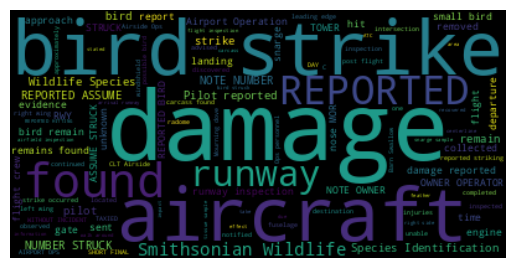

In [45]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

Comment: Words like strike, aircraft, damage were most common in the remarks.

In [46]:
stopwords = set(STOPWORDS)
stopwords.add("strike")
stopwords.add("damage")
stopwords.add("aircraft")
stopwords.add("found")
stopwords.add("reported")
stopwords.add("remain")
stopwords.add("remains")
stopwords.add("bird")

(-0.5, 399.5, 199.5, -0.5)

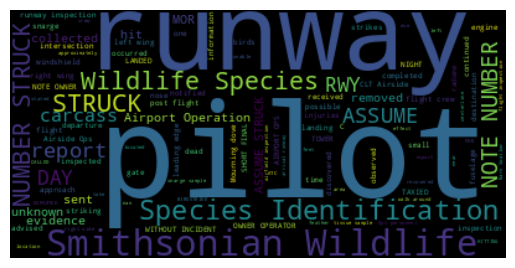

In [47]:
wc = WordCloud(stopwords=stopwords).generate(remarks)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

## X (Damage) vs y (Damage level): Classification:

In [168]:
df[df['DAMAGE_LEVEL'] != 'None'].loc[:, 'DAMAGE_LEVEL'].value_counts(dropna=False)

0    7996
5    6976
2     539
1      94
3      31
4       2
Name: DAMAGE_LEVEL, dtype: int64

### Filter X (Damage related columns)

In [48]:
X = df.loc[:, damage_columns[1:]]
X.head()

,INDICATED_DAMAGE,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,INGESTED_OTHER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,NaN,False
4,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN,False


In [49]:
X.INDICATED_DAMAGE.value_counts(dropna=False)

False    14972
True       666
Name: INDICATED_DAMAGE, dtype: int64

### Filter y (DAMAGE_LEVEL)

In [50]:
y = df["DAMAGE_LEVEL"]

In [51]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: DAMAGE_LEVEL
Non-Null Count  Dtype 
--------------  ----- 
8662 non-null   object
dtypes: object(1)
memory usage: 122.3+ KB


### EDA

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   INDICATED_DAMAGE  15638 non-null  bool  
 1   STR_RAD           15638 non-null  bool  
 2   DAM_RAD           15638 non-null  bool  
 3   STR_WINDSHLD      15638 non-null  bool  
 4   DAM_WINDSHLD      15638 non-null  bool  
 5   STR_NOSE          15638 non-null  bool  
 6   DAM_NOSE          15638 non-null  bool  
 7   STR_ENG1          15638 non-null  bool  
 8   DAM_ENG1          15638 non-null  bool  
 9   ING_ENG1          15638 non-null  bool  
 10  STR_ENG2          15638 non-null  bool  
 11  DAM_ENG2          15638 non-null  bool  
 12  ING_ENG2          15638 non-null  bool  
 13  STR_ENG3          15638 non-null  bool  
 14  DAM_ENG3          15638 non-null  bool  
 15  ING_ENG3          15638 non-null  bool  
 16  STR_ENG4          15638 non-null  bool  
 17  DAM_ENG4    

Comments: All the X variables are of boolean type except Other Specify which is a string type

In [53]:
X.OTHER_SPECIFY.str.lower().sort_values().value_counts(dropna=False)

NaN                                                                       12689
part not reported                                                          2613
engine #1 cowling                                                            38
engine #2 cowling                                                            28
pitot tube                                                                   18
part not reported                                                            13
engine #2 cowl                                                                9
engine #1 nacelle                                                             8
engine #1 cowl                                                                8
engine #2 nacelle                                                             7
engine cowling                                                                6
chin bubble                                                                   3
horizontal stabilizer                   

Comment: There are **80%+** null values in the other specify column where user enters text regarding damage. Most common comments mentioned by the users are *engine cowling* and *part not reported*

In [54]:
X = X.drop("OTHER_SPECIFY", axis=1)

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   STR_RAD           15638 non-null  bool 
 2   DAM_RAD           15638 non-null  bool 
 3   STR_WINDSHLD      15638 non-null  bool 
 4   DAM_WINDSHLD      15638 non-null  bool 
 5   STR_NOSE          15638 non-null  bool 
 6   DAM_NOSE          15638 non-null  bool 
 7   STR_ENG1          15638 non-null  bool 
 8   DAM_ENG1          15638 non-null  bool 
 9   ING_ENG1          15638 non-null  bool 
 10  STR_ENG2          15638 non-null  bool 
 11  DAM_ENG2          15638 non-null  bool 
 12  ING_ENG2          15638 non-null  bool 
 13  STR_ENG3          15638 non-null  bool 
 14  DAM_ENG3          15638 non-null  bool 
 15  ING_ENG3          15638 non-null  bool 
 16  STR_ENG4          15638 non-null  bool 
 17  DAM_ENG4          15638 non-nul

Comment: All of the independent variables are boolean type.

### Handle missing values

Comment: Since all independent variables are boolean, there might not be a need for further encoding. Boolean variables can typically be used directly in machine learning models.

In [56]:
y.value_counts(dropna=False)

N      7996
NaN    6976
M?      539
M        94
S        31
D         2
Name: DAMAGE_LEVEL, dtype: int64

Comment: Since "NaN" is one of the damage levels, it appears that missing values are meaningful in this context. We are not treating them as typical missing data. However, we want to ensure that it doesn't cause issues with the modeling process. We can create a separate category for it or assign a specific label to make it explicit that it represents missing or unknown data. For example, you could label it as "Unknown" or "Not Available."

In [57]:
y.replace(np.NaN, "Unknown", inplace=True)
y.value_counts(dropna=False)

N          7996
Unknown    6976
M?          539
M            94
S            31
D             2
Name: DAMAGE_LEVEL, dtype: int64

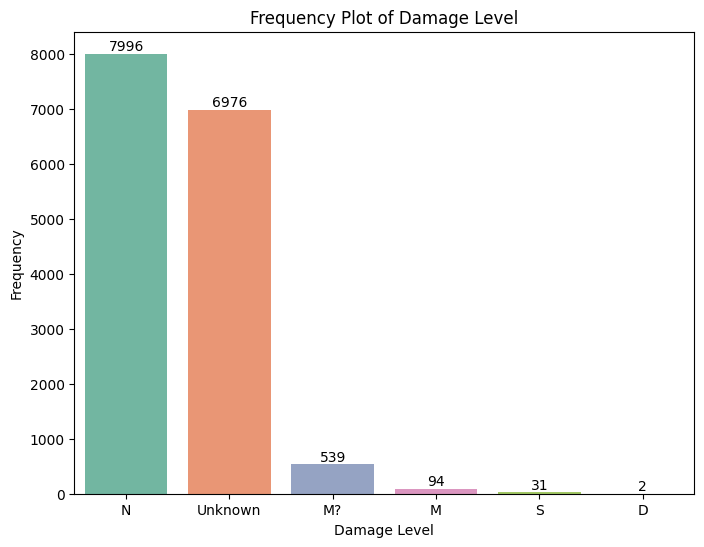

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=y.value_counts(dropna=False).reset_index(), y='DAMAGE_LEVEL', x='index', palette='Set2')
plt.xlabel('Damage Level')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Damage Level')

# Add labels to the bars
for index, row in y.value_counts(dropna=False).reset_index().iterrows():
    ax.text(row.name, row.DAMAGE_LEVEL, f'{row.DAMAGE_LEVEL}', ha='center', va='bottom')

plt.show()

### Encoding Categorical Variables

Manually encoding the "damage level" variable based on the provided descriptions:

"N" (None) -> 0    
"M" (Minor) -> 1   
"M?" (Undetermined) -> 2   
"S" (Substantial) -> 3   
"D" (Destroyed) -> 4   
"NaN" (Unknown) -> 5   
By manually encoding the variable, we ensure that the numerical representation aligns perfectly with the meaning of each category, as defined in the descriptions. This encoding will make it easier for the machine learning model to understand the relationship between the "damage level" and other features in the dataset.

In [59]:
y.replace("N", 0, inplace=True)
y.replace("M", 1, inplace=True)
y.replace("M?", 2, inplace=True)
y.replace("S", 3, inplace=True)
y.replace("D", 4, inplace=True)
y.replace("Unknown", 5, inplace=True)

In [60]:
y.value_counts(dropna=False)

0    7996
5    6976
2     539
1      94
3      31
4       2
Name: DAMAGE_LEVEL, dtype: int64

In [61]:
# Combine the category with low count with another category
y = y.replace({4: 3})
y.value_counts()

0    7996
5    6976
2     539
1      94
3      33
Name: DAMAGE_LEVEL, dtype: int64

### Feature Selection

Comment: In this case, we have 34 independent boolean variables, and we want to predict the "damage level" based on these features. Feature selection becomes important to identify which of these boolean variables are most relevant for predicting the "damage level." Given that the features are all boolean, the selection process can be straightforward.

#### Method 1: Univariate Feature Selection:

Comment: Methods like chi-squared, mutual information, and ANOVA can be used to evaluate the statistical relationship between each feature and the target variable. Features with the highest scores are selected.

Chi-sq test

In [62]:
from sklearn.feature_selection import SelectKBest, chi2

k= 10 # adjust as needed
# Assuming you used SelectKBest for feature selection
selector = SelectKBest(score_func=chi2, k=k)  # Replace 'k' with your selected value
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
# Assuming 'column_names' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

In [63]:
X_new.shape

(15638, 10)

In [64]:
selected_column_names

['INDICATED_DAMAGE',
 'DAM_RAD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'DAM_ENG1',
 'DAM_ENG2',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'DAM_OTHER']

Comment: Find optimal k value using feature importance scores

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Define a range of k values to try
k_values = range(1, 35, 1)

# Initialize variables to keep track of the best k and its corresponding score
best_k = None
best_score = 0  # Initialize with a low value for maximization

d = {}

for k in k_values:
    # Select the top k features using the chi-squared test
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)

    selected_indices = selector.get_support(indices=True)
    # Assuming 'column_names' is a list of original column names
    selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

    # Calculate the cumulative importance of the selected features
    cumulative_importance = sum(selector.scores_[:k])

    # adding {k-value: [k-score, selected_columns]} to d
    d[k] = [cumulative_importance, selected_column_names]

    # Check if this k value has a better cumulative importance
    if cumulative_importance > best_score:
        best_score = cumulative_importance
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best cumulative importance score: {best_score}")


Best k value: 14
Best cumulative importance score: 28178.16901428808


In [66]:
print(d)

{1: [14971.999999999864, ['INDICATED_DAMAGE']], 2: [15733.118966685597, ['INDICATED_DAMAGE', 'DAM_WING_ROT']], 3: [17428.634889592464, ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_WING_ROT']], 4: [18533.723737953354, ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_ENG2', 'DAM_WING_ROT']], 5: [20891.687235133864, ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_ENG2', 'DAM_WING_ROT', 'DAM_OTHER']], 6: [22092.059461093315, ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'DAM_OTHER']], 7: [23559.808763877485, ['INDICATED_DAMAGE', 'DAM_RAD', 'DAM_WINDSHLD', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'DAM_OTHER']], 8: [23958.9419657166, ['INDICATED_DAMAGE', 'DAM_RAD', 'DAM_WINDSHLD', 'DAM_NOSE', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'DAM_OTHER']], 9: [25221.45643636623, ['INDICATED_DAMAGE', 'DAM_RAD', 'DAM_WINDSHLD', 'DAM_NOSE', 'DAM_ENG1', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'DAM_OTHER']], 10: [25468.239781204353, ['INDICATED_DAMAGE', 'DAM_RAD', 'DAM_WINDSHL

Comment: The optimal k = 14. We will consider k =13 since the importance score doesn't have much difference.     

k = 13     
importance score = 31298.882087187147,     
Selected columns =
['DAMAGE_LEVEL',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'DAM_ENG1',
   'DAM_ENG2',
   'STR_WING_ROT',
   'STR_LGHTS',
   'DAM_LGHTS',
   'STR_OTHER']

In [67]:
###Train and Test split
cols = ['INDICATED_DAMAGE', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE', 'DAM_ENG1', 'DAM_ENG2', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_LGHTS', 'DAM_OTHER']
X1 = X.loc[:, cols]
X1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   DAM_RAD           15638 non-null  bool 
 2   STR_WINDSHLD      15638 non-null  bool 
 3   DAM_WINDSHLD      15638 non-null  bool 
 4   STR_NOSE          15638 non-null  bool 
 5   DAM_NOSE          15638 non-null  bool 
 6   DAM_ENG1          15638 non-null  bool 
 7   DAM_ENG2          15638 non-null  bool 
 8   STR_WING_ROT      15638 non-null  bool 
 9   DAM_WING_ROT      15638 non-null  bool 
 10  STR_FUSE          15638 non-null  bool 
 11  DAM_LGHTS         15638 non-null  bool 
 12  DAM_OTHER         15638 non-null  bool 
dtypes: bool(13)
memory usage: 198.7 KB


In [68]:
y.value_counts()

0    7996
5    6976
2     539
1      94
3      33
Name: DAMAGE_LEVEL, dtype: int64

In [69]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X1, y):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    6397
1      75
2     431
3      26
5    5581
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    1599
1      19
2     108
3       7
5    1395
Name: DAMAGE_LEVEL, dtype: int64


In [70]:
#### Model Fitting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [71]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [73]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [74]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.62      0.75      1599
           1       0.00      0.00      0.00        19
           2       0.81      1.00      0.89       108
           3       0.00      0.00      0.00         7
           5       0.69      0.98      0.81      1395

    accuracy                           0.79      3128
   macro avg       0.49      0.52      0.49      3128
weighted avg       0.83      0.79      0.78      3128

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.62      0.75      1599
           1       1.00      0.05      0.10        19
           2       0.81      1.00      0.90       108
           3       0.00      0.00      0.00         7
           5       0.69      0.98      0.81      1395

    accuracy                           0.79      3128
   macro avg       0.69      0.53      0.51      3128
weighted avg       0.84      0.79      0.78

#### Method 2: Feature Importance from Tree-Based Models

In [75]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define a range of k values to try
k_values = range(1, 35, 1)

# Initialize variables to keep track of the best k and its corresponding score
best_k = None
best_score = 0  # Initialize with a low value for maximization

d = {}

# Loop through different k values
for k in k_values:
    # Select top k features
    selector = SelectKBest(score_func=chi2, k=k)
    X_new = selector.fit_transform(X, y)
    selected_indices = selector.get_support(indices=True)
    # Assuming 'column_names' is a list of original column names
    selected_column_names = [X.columns.tolist()[i] for i in selected_indices]

    # Initialize and train a machine learning model (e.g., RandomForest)
    model = RandomForestClassifier()

    # Calculate the cross-validated score (e.g., accuracy)
    scores = cross_val_score(model, X_new, y, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()

    # adding {k-value, k-score} to d
    d[k] = [mean_score, selected_column_names]

    # Check if this k value has a better score
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best cross-validated score: {best_score}")


Best k value: 27
Best cross-validated score: 0.8900107307282419


In [76]:
d

{1: [0.5457859195179025, ['INDICATED_DAMAGE']],
 2: [0.5457859195179025, ['INDICATED_DAMAGE', 'DAM_WING_ROT']],
 3: [0.5457859195179025, ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_WING_ROT']],
 4: [0.5457859195179025,
  ['INDICATED_DAMAGE', 'DAM_WINDSHLD', 'DAM_ENG2', 'DAM_WING_ROT']],
 5: [0.5457859195179025,
  ['INDICATED_DAMAGE',
   'DAM_WINDSHLD',
   'DAM_ENG2',
   'DAM_WING_ROT',
   'DAM_OTHER']],
 6: [0.5753290374978428,
  ['INDICATED_DAMAGE',
   'DAM_WINDSHLD',
   'DAM_ENG2',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'DAM_OTHER']],
 7: [0.5753290374978428,
  ['INDICATED_DAMAGE',
   'DAM_RAD',
   'DAM_WINDSHLD',
   'DAM_ENG2',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'DAM_OTHER']],
 8: [0.5752011602599911,
  ['INDICATED_DAMAGE',
   'DAM_RAD',
   'DAM_WINDSHLD',
   'DAM_NOSE',
   'DAM_ENG2',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'DAM_OTHER']],
 9: [0.5751372011937935,
  ['INDICATED_DAMAGE',
   'DAM_RAD',
   'DAM_WINDSHLD',
   'DAM_NOSE',
   'DAM_ENG1',
   'DAM_ENG2',
   'STR_WING

Comment: From this approach, we will select the following:     
k = 26 features    
cross-validation score = 0.8991640462385873,      
selected columns =
  ['INDICATED_DAMAGE',
   'STR_RAD',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'STR_ENG1',
   'DAM_ENG1',
   'ING_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'ING_ENG2',
   'STR_PROP',
   'DAM_PROP',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'STR_FUSE',
   'DAM_FUSE',
   'STR_LG',
   'DAM_LG',
   'STR_TAIL',
   'DAM_TAIL',
   'STR_LGHTS',
   'DAM_LGHTS',
   'DAM_OTHER']

Comment: Tree-based models like decision trees and random forests can provide feature importance scores. You can use these scores to select the most important features.

In [77]:
###Train and Test split
cols = ['INDICATED_DAMAGE',
   'STR_RAD',
   'DAM_RAD',
   'STR_WINDSHLD',
   'DAM_WINDSHLD',
   'STR_NOSE',
   'DAM_NOSE',
   'STR_ENG1',
   'DAM_ENG1',
   'ING_ENG1',
   'STR_ENG2',
   'DAM_ENG2',
   'ING_ENG2',
   'STR_PROP',
   'DAM_PROP',
   'STR_WING_ROT',
   'DAM_WING_ROT',
   'STR_FUSE',
   'DAM_FUSE',
   'STR_LG',
   'DAM_LG',
   'STR_TAIL',
   'DAM_TAIL',
   'STR_LGHTS',
   'DAM_LGHTS',
   'DAM_OTHER']
X2 = X.loc[:, cols]
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   STR_RAD           15638 non-null  bool 
 2   DAM_RAD           15638 non-null  bool 
 3   STR_WINDSHLD      15638 non-null  bool 
 4   DAM_WINDSHLD      15638 non-null  bool 
 5   STR_NOSE          15638 non-null  bool 
 6   DAM_NOSE          15638 non-null  bool 
 7   STR_ENG1          15638 non-null  bool 
 8   DAM_ENG1          15638 non-null  bool 
 9   ING_ENG1          15638 non-null  bool 
 10  STR_ENG2          15638 non-null  bool 
 11  DAM_ENG2          15638 non-null  bool 
 12  ING_ENG2          15638 non-null  bool 
 13  STR_PROP          15638 non-null  bool 
 14  DAM_PROP          15638 non-null  bool 
 15  STR_WING_ROT      15638 non-null  bool 
 16  DAM_WING_ROT      15638 non-null  bool 
 17  STR_FUSE          15638 non-nul

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X2, y):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    6397
1      75
2     431
3      26
5    5581
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    1599
1      19
2     108
3       7
5    1395
Name: DAMAGE_LEVEL, dtype: int64


In [79]:
y.value_counts()

0    7996
5    6976
2     539
1      94
3      33
Name: DAMAGE_LEVEL, dtype: int64

In [80]:
#### Model Fitting

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
# Create and fit the ordinal logistic regression model
# You can specify your formula, which relates features to the ordinal response variable
formula = "DAMAGE_LEVEL ~ INDICATED_DAMAGE + STR_RAD + DAM_RAD + STR_WINDSHLD \
+ DAM_WINDSHLD + STR_NOSE + DAM_NOSE + STR_ENG1 + DAM_ENG1' + STR_ENG2 + DAM_ENG2 \
+ STR_WING_ROT + DAM_WING_ROT + STR_FUSE + DAM_FUSE + STR_LG + DAM_LG + DAM_TAIL \
+ STR_LGHTS + DAM_LGHTS + DAM_OTHER"

In [82]:
# Create a list of candidate models
'''
models = [
    ('Logistic Regression', smf.mnlogit(formula, data=pd.DataFrame({'DAMAGE_LEVEL': y_train,
                                                                    'INDICATED_DAMAGE': X_train.loc[:, 'INDICATED_DAMAGE'],
                                                                    'STR_RAD': X_train.loc[:, 'STR_RAD'],
                                                                    'DAM_RAD': X_train.loc[:, 'DAM_RAD'],
                                                                    'STR_WINDSHLD': X_train.loc[:, 'STR_WINDSHLD'],
                                                                    'DAM_WINDSHLD': X_train.loc[:, 'DAM_WINDSHLD'],
                                                                    'STR_NOSE': X_train.loc[:, 'STR_NOSE'],
                                                                    'DAM_NOSE': X_train.loc[:, 'DAM_NOSE'],
                                                                    'STR_ENG1': X_train.loc[:, 'STR_ENG1'],
                                                                    'DAM_ENG1': X_train.loc[:, 'DAM_ENG1'],
                                                                    'STR_ENG2': X_train.loc[:, 'STR_ENG2'],
                                                                    'DAM_ENG2': X_train.loc[:, 'DAM_ENG2'],
                                                                    'STR_WING_ROT': X_train.loc[:, 'STR_WING_ROT'],
                                                                    'DAM_WING_ROT': X_train.loc[:, 'DAM_WING_ROT'],
                                                                    'STR_FUSE': X_train.loc[:, 'STR_FUSE'],
                                                                    'DAM_FUSE': X_train.loc[:, 'DAM_FUSE'],
                                                                    'STR_LG': X_train.loc[:, 'STR_LG'],
                                                                    'DAM_LG': X_train.loc[:, 'DAM_LG'],
                                                                    'DAM_TAIL': X_train.loc[:, 'DAM_TAIL'],
                                                                    'STR_LGHTS': X_train.loc[:, 'STR_LGHTS'],
                                                                    'DAM_LGHTS': X_train.loc[:, 'DAM_LGHTS'],
                                                                    'DAM_OTHER': X_train.loc[:, 'DAM_OTHER']
                                                                    }))),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]
'''

"\nmodels = [\n    ('Logistic Regression', smf.mnlogit(formula, data=pd.DataFrame({'DAMAGE_LEVEL': y_train,\n                                                                    'INDICATED_DAMAGE': X_train.loc[:, 'INDICATED_DAMAGE'],\n                                                                    'STR_RAD': X_train.loc[:, 'STR_RAD'],\n                                                                    'DAM_RAD': X_train.loc[:, 'DAM_RAD'],\n                                                                    'STR_WINDSHLD': X_train.loc[:, 'STR_WINDSHLD'],\n                                                                    'DAM_WINDSHLD': X_train.loc[:, 'DAM_WINDSHLD'],\n                                                                    'STR_NOSE': X_train.loc[:, 'STR_NOSE'],\n                                                                    'DAM_NOSE': X_train.loc[:, 'DAM_NOSE'],\n                                                                    'STR_ENG1': X_train.loc[:, 'STR_

In [83]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [84]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [85]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1599
           1       0.00      0.00      0.00        19
           2       0.81      0.96      0.88       108
           3       0.00      0.00      0.00         7
           5       0.83      0.97      0.89      1395

    accuracy                           0.89      3128
   macro avg       0.52      0.55      0.53      3128
weighted avg       0.89      0.89      0.88      3128

Random Forest
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1599
           1       0.50      0.05      0.10        19
           2       0.82      0.99      0.90       108
           3       1.00      0.14      0.25         7
           5       0.83      0.97      0.89      1395

    accuracy                           0.89      3128
   macro avg       0.82      0.60      0.61      3128
weighted avg       0.90      0.89      0.89

##### Best Model

Random Forest    
precision  |  recall | f1-score  |  support


           0       0.98      0.83      0.90      1859
           1       0.33      0.08      0.13        12
           2       0.85      0.97      0.91       109
           3       0.50      0.11      0.18         9
           5       0.82      0.98      0.89      1457

    accuracy                           0.90      3446   
   macro avg       0.70      0.60      0.60      3446   
weighted avg       0.91      0.90      0.89      3446

#### Method 3: Recursive Feature Elimination (RFE)

Comment: RFE is an iterative method that starts with all features and eliminates the least important ones in each iteration, based on a model's performance. It continues until the desired number of features is reached.

In [86]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier  # You can use a different classifier if needed

# Define your machine learning model, e.g., RandomForestClassifier
model = RandomForestClassifier()

# Specify the number of features to select (optional, you can omit this)
# n_features_to_select = 10  # Adjust as needed

# Create the RFE model
# rfe = RFE(model, n_features_to_select=n_features_to_select)
rfe = RFE(model)

# Fit RFE to your data
X_new = rfe.fit_transform(X, y)

# Get the ranking of features, with 1 being the most important
feature_ranking = rfe.ranking_

# Get the support mask (True for selected features, False for eliminated features)
support_mask = rfe.support_


In [87]:
selected_indices = rfe.get_support(indices=True)
# Assuming 'column_names' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i in selected_indices]
selected_column_names

['INDICATED_DAMAGE',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'STR_NOSE',
 'STR_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'ING_ENG2',
 'STR_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'STR_LG',
 'STR_TAIL',
 'STR_OTHER']

In [88]:
rfe.get_support()

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False])

In [89]:
# 'X' is a list of original column names
selected_column_names = [X.columns.tolist()[i] for i, support in enumerate(support_mask) if support]

print(f"Selected column names: {selected_column_names}")

Selected column names: ['INDICATED_DAMAGE', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_PROP', 'STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_OTHER']


In [90]:
len(selected_column_names)

17

Comment: RFE has selected 17 features. They are:     
 ['INDICATED_DAMAGE',
 'STR_RAD',
 'STR_WINDSHLD',
 'STR_NOSE',
 'STR_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'ING_ENG2',
 'STR_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'STR_LG',
 'STR_TAIL',
 'STR_LGHTS',
 'STR_OTHER',
 'DAM_OTHER']

In [91]:
feature_ranking

array([ 1,  1,  1,  1,  5,  1,  3,  1,  7,  1,  1,  1,  1, 10, 16, 15, 14,
       17, 18,  1, 13,  1,  1,  1,  6,  1, 11,  1,  9,  4, 12,  1,  2,  8])

Comment: Features are ranked from 1 to the total number of features. A lower number indicates a higher feature importance. In this case, "1" is the highest-ranked feature, "2" is the second-highest ranked feature, and so on.

The features with a ranking of "1" are considered the most important features based on the RFE (Recursive Feature Elimination) process.

Features with higher rankings (e.g., "16," "15," "14," "17," "18") are considered less important and are likely to be eliminated if you set a specific number of features to select during the RFE process.

In [92]:
support_mask

array([ True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False])

#### Method 4: L1 Regularization (Lasso)

Comment: L1 regularization adds a penalty term to the model's cost function for the absolute values of feature coefficients. This encourages the model to set some coefficients to exactly zero, effectively performing feature selection.

In [93]:
from sklearn.linear_model import LogisticRegression

#  adjust the strength of the regularization with the C parameter (lower values indicate stronger regularization)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

model.fit(X, y)

# access the feature coefficients to see which features are non-zero. Non-zero coefficients indicate selected features.
feature_coefficients = model.coef_[0]



In [94]:
feature_coefficients

array([-57.85628735,   8.23353159,   0.        ,   7.6926402 ,
         0.        ,   7.87365816,   0.        ,   7.30022191,
         0.        ,   0.39827279,   7.22308748,   0.        ,
         0.        ,   5.66842096,   0.        ,   0.        ,
         1.77103724,   0.        ,   0.        ,   7.65861089,
         0.        ,   8.24925102,   0.        ,   7.71721901,
         0.        ,   7.47744069,   0.        ,   6.88326884,
         0.        ,   5.25227721,   0.        ,   4.55634775,
         0.        ,   0.99209583])

In [95]:
selected_features = [X.columns.tolist()[i] for i, coef in enumerate(feature_coefficients) if coef != 0]
print("Selected features:")
print(selected_features)

Selected features:
['INDICATED_DAMAGE', 'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER', 'INGESTED_OTHER']


In [96]:
len(selected_features)

17

Comment: 17 columns are selected using L1 regularization method.    
Features = ['INDICATED_DAMAGE', 'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER', 'INGESTED_OTHER']

In [97]:
###Train and Test split
cols = ['INDICATED_DAMAGE', 'STR_RAD', 'STR_WINDSHLD', 'STR_NOSE', 'STR_ENG1', 'ING_ENG1', 'STR_ENG2', 'STR_ENG3', 'STR_ENG4', 'STR_PROP', 'STR_WING_ROT', 'STR_FUSE', 'STR_LG', 'STR_TAIL', 'STR_LGHTS', 'STR_OTHER', 'INGESTED_OTHER']
X4 = X.loc[:, cols]
X4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   STR_RAD           15638 non-null  bool 
 2   STR_WINDSHLD      15638 non-null  bool 
 3   STR_NOSE          15638 non-null  bool 
 4   STR_ENG1          15638 non-null  bool 
 5   ING_ENG1          15638 non-null  bool 
 6   STR_ENG2          15638 non-null  bool 
 7   STR_ENG3          15638 non-null  bool 
 8   STR_ENG4          15638 non-null  bool 
 9   STR_PROP          15638 non-null  bool 
 10  STR_WING_ROT      15638 non-null  bool 
 11  STR_FUSE          15638 non-null  bool 
 12  STR_LG            15638 non-null  bool 
 13  STR_TAIL          15638 non-null  bool 
 14  STR_LGHTS         15638 non-null  bool 
 15  STR_OTHER         15638 non-null  bool 
 16  INGESTED_OTHER    15638 non-null  bool 
dtypes: bool(17)
memory usage: 259.7

In [98]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X4, y):
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    6397
1      75
2     431
3      26
5    5581
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    1599
1      19
2     108
3       7
5    1395
Name: DAMAGE_LEVEL, dtype: int64


In [99]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [100]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.94      0.86       108
           3       0.00      0.00      0.00         7
           5       0.99      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.52      0.54      0.53      3128
weighted avg       0.90      0.89      0.88      3128

Random Forest
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.99      0.89       108
           3       0.00      0.00      0.00         7
           5       1.00      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.53      0.55      0.53      3128
weighted avg       0.90      0.89      0.88

##### Best Model


Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1859
           1       0.20      0.08      0.12        12
           2       0.86      0.95      0.90       109
           3       0.75      0.33      0.46         9
           5       0.83      0.98      0.90      1457

    accuracy                           0.90      3446
   macro avg       0.72      0.64      0.66      3446
weighted avg       0.91      0.90      0.90      3446


#### Method 5: Correlation Analysis

Comment: You can calculate the correlation between features and the target variable. Features with high correlation are more likely to be important.

In [101]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15638 entries, 0 to 15637
Series name: DAMAGE_LEVEL
Non-Null Count  Dtype
--------------  -----
15638 non-null  int64
dtypes: int64(1)
memory usage: 122.3 KB


In [102]:
import pandas as pd

# Assuming 'df' is your DataFrame with all variables including 'damage_level'
correlations = X.corrwith(y)

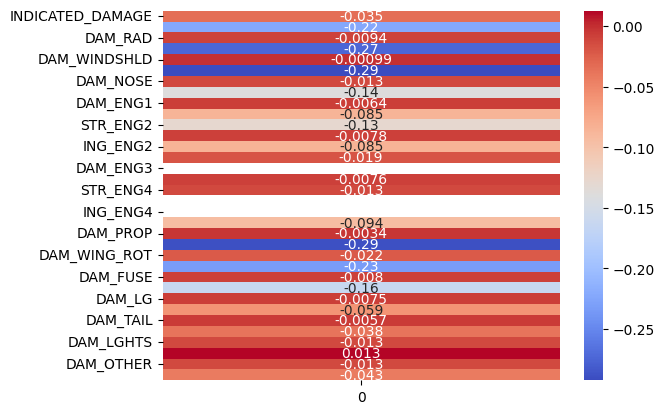

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm')
plt.show()


In [104]:
correlations

INDICATED_DAMAGE   -0.03
STR_RAD            -0.22
DAM_RAD            -0.01
STR_WINDSHLD       -0.27
DAM_WINDSHLD       -0.00
STR_NOSE           -0.29
DAM_NOSE           -0.01
STR_ENG1           -0.14
DAM_ENG1           -0.01
ING_ENG1           -0.09
STR_ENG2           -0.13
DAM_ENG2           -0.01
ING_ENG2           -0.08
STR_ENG3           -0.02
DAM_ENG3             NaN
ING_ENG3           -0.01
STR_ENG4           -0.01
DAM_ENG4             NaN
ING_ENG4             NaN
STR_PROP           -0.09
DAM_PROP           -0.00
STR_WING_ROT       -0.29
DAM_WING_ROT       -0.02
STR_FUSE           -0.23
DAM_FUSE           -0.01
STR_LG             -0.16
DAM_LG             -0.01
STR_TAIL           -0.06
DAM_TAIL           -0.01
STR_LGHTS          -0.04
DAM_LGHTS          -0.01
STR_OTHER           0.01
DAM_OTHER          -0.01
INGESTED_OTHER     -0.04
dtype: float64

In [105]:
threshold = 0.02  # Adjust the threshold as needed
selected_features = correlations[abs(correlations) >= threshold]
print(selected_features)


INDICATED_DAMAGE   -0.03
STR_RAD            -0.22
STR_WINDSHLD       -0.27
STR_NOSE           -0.29
STR_ENG1           -0.14
ING_ENG1           -0.09
STR_ENG2           -0.13
ING_ENG2           -0.08
STR_PROP           -0.09
STR_WING_ROT       -0.29
DAM_WING_ROT       -0.02
STR_FUSE           -0.23
STR_LG             -0.16
STR_TAIL           -0.06
STR_LGHTS          -0.04
INGESTED_OTHER     -0.04
dtype: float64


From Correlation Analysis, we found that 15 features are strongly correlated. They are:

INDICATED_DAMAGE   
STR_RAD            
STR_WINDSHLD       
STR_NOSE           
STR_ENG1           
ING_ENG1           
STR_ENG2           
ING_ENG2           
STR_PROP           
STR_WING_ROT       
STR_FUSE           
STR_LG            
STR_TAIL           
STR_LGHTS          
STR_OTHER

In [106]:
###Train and Test split
cols = ['INDICATED_DAMAGE',
'STR_RAD',
'STR_WINDSHLD',
'STR_NOSE',
'STR_ENG1',
'ING_ENG1',
'STR_ENG2',
'ING_ENG2',
'STR_PROP',
'STR_WING_ROT',
'STR_FUSE',
'STR_LG',
'STR_TAIL',
'STR_LGHTS',
'STR_OTHER']
X3 = X.loc[:, cols]
X3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   STR_RAD           15638 non-null  bool 
 2   STR_WINDSHLD      15638 non-null  bool 
 3   STR_NOSE          15638 non-null  bool 
 4   STR_ENG1          15638 non-null  bool 
 5   ING_ENG1          15638 non-null  bool 
 6   STR_ENG2          15638 non-null  bool 
 7   ING_ENG2          15638 non-null  bool 
 8   STR_PROP          15638 non-null  bool 
 9   STR_WING_ROT      15638 non-null  bool 
 10  STR_FUSE          15638 non-null  bool 
 11  STR_LG            15638 non-null  bool 
 12  STR_TAIL          15638 non-null  bool 
 13  STR_LGHTS         15638 non-null  bool 
 14  STR_OTHER         15638 non-null  bool 
dtypes: bool(15)
memory usage: 229.2 KB


In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X3, y):
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    6397
1      75
2     431
3      26
5    5581
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    1599
1      19
2     108
3       7
5    1395
Name: DAMAGE_LEVEL, dtype: int64


In [108]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })

##### Results

In [109]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.94      0.86       108
           3       0.00      0.00      0.00         7
           5       0.99      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.52      0.54      0.53      3128
weighted avg       0.90      0.89      0.88      3128

Random Forest
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.99      0.89       108
           3       0.00      0.00      0.00         7
           5       1.00      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.53      0.55      0.53      3128
weighted avg       0.90      0.89      0.88

##### Best Model

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1859
           1       0.20      0.08      0.12        12
           2       0.86      0.95      0.90       109
           3       0.75      0.33      0.46         9
           5       0.83      0.98      0.90      1457

    accuracy                           0.90      3446
   macro avg       0.72      0.64      0.66      3446
weighted avg       0.91      0.90      0.90      3446


#### Method 6: Principal Component Analysis (PCA)

Comment: PCA is a dimensionality reduction technique that can be used to create linear combinations of features (principal components) that capture most of the data's variance. These components can be used as reduced features.

In [110]:
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA(n_components=2)

# Fit the data and transform it
data_pca = pca.fit_transform(X)



In [111]:
# The transformed data contains the principal components
print("Original Data:\n", X)
print("Transformed Data (2 principal components):\n", data_pca)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Original Data:
        INDICATED_DAMAGE  STR_RAD  DAM_RAD  STR_WINDSHLD  DAM_WINDSHLD  \
0                 False    False    False         False         False   
1                 False    False    False         False         False   
2                 False    False    False         False         False   
3                 False    False    False         False         False   
4                 False    False    False         False         False   
...                 ...      ...      ...           ...           ...   
15633             False    False    False         False         False   
15634             False    False    False         False         False   
15635             False    False    False         False         False   
15636             False    False    False         False         False   
15637              True    False    False         False         False   

       STR_NOSE  DAM_NOSE  STR_ENG1  DAM_ENG1  ING_ENG1  STR_ENG2  DAM_ENG2  \
0         False     False   

#### Method 7: Wrapper Methods

Comment: Wrapper methods involve using a specific machine learning model to evaluate different subsets of features and select the one that results in the best model performance. Examples include forward selection, backward elimination, and recursive feature addition.

#### Method 8: Embedded Methods

Comment: Some machine learning algorithms have built-in feature selection mechanisms. For example, linear models with L1 regularization (e.g., Lasso) perform feature selection during model training.

### Imbalanced Data in y

Comment: Check for class imbalance while considering the new descriptions. Some damage levels may be more common than others, and you should address this imbalance as necessary.

### Outlier Detection in X

Comment: Identify if there are any outliers in the boolean variables that might affect the model's performance.

### Data Transformation

Comment: With boolean variables, feature engineering might involve creating interaction terms or composite features that better capture the relationships between the independent variables and the target variable.

### Data Normalization in X

Comment: Depending on the chosen algorithms, data normalization might be beneficial to ensure that boolean variables have a consistent impact on the model.

### Train test split

All 34 columns

In [112]:
cols = X.columns.tolist()
X_selected = X.loc[:, cols]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   INDICATED_DAMAGE  15638 non-null  bool 
 1   STR_RAD           15638 non-null  bool 
 2   DAM_RAD           15638 non-null  bool 
 3   STR_WINDSHLD      15638 non-null  bool 
 4   DAM_WINDSHLD      15638 non-null  bool 
 5   STR_NOSE          15638 non-null  bool 
 6   DAM_NOSE          15638 non-null  bool 
 7   STR_ENG1          15638 non-null  bool 
 8   DAM_ENG1          15638 non-null  bool 
 9   ING_ENG1          15638 non-null  bool 
 10  STR_ENG2          15638 non-null  bool 
 11  DAM_ENG2          15638 non-null  bool 
 12  ING_ENG2          15638 non-null  bool 
 13  STR_ENG3          15638 non-null  bool 
 14  DAM_ENG3          15638 non-null  bool 
 15  ING_ENG3          15638 non-null  bool 
 16  STR_ENG4          15638 non-null  bool 
 17  DAM_ENG4          15638 non-nul

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the StratifiedShuffleSplit with the desired split ratio
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into train and test sets while maintaining the distribution
for train_index, test_index in splitter.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of "DAMAGE_LEVEL" in both sets
train_distribution = y_train.value_counts().sort_index()
test_distribution = y_test.value_counts().sort_index()

print("Train Set Distribution:")
print(train_distribution)

print("\nTest Set Distribution:")
print(test_distribution)

Train Set Distribution:
0    6397
1      75
2     431
3      26
5    5581
Name: DAMAGE_LEVEL, dtype: int64

Test Set Distribution:
0    1599
1      19
2     108
3       7
5    1395
Name: DAMAGE_LEVEL, dtype: int64


### Model Selection and Training

In [114]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [115]:
# Create a list of candidate models
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear',multi_class='ovr')),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', decision_function_shape='ovr', C=1))
]

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [117]:
# Evaluate and compare models
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': confusion
    })


In [118]:
print(results[0]["Classification Report"])

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.94      0.87       108
           3       0.00      0.00      0.00         7
           5       0.99      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.53      0.54      0.53      3128
weighted avg       0.89      0.89      0.88      3128



In [119]:
print(results[0]["Confusion Matrix"])

[[1592    0    0    0    7]
 [   1    0   18    0    0]
 [   5    0  102    0    1]
 [   0    0    7    0    0]
 [ 319    0    0    0 1076]]


##### Results

In [120]:
for i in results:
  print(i["Model"])
  print(i["Classification Report"])

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.00      0.00      0.00        19
           2       0.80      0.94      0.87       108
           3       0.00      0.00      0.00         7
           5       0.99      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.53      0.54      0.53      3128
weighted avg       0.89      0.89      0.88      3128

Random Forest
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1599
           1       0.50      0.05      0.10        19
           2       0.82      0.99      0.90       108
           3       1.00      0.14      0.25         7
           5       1.00      0.77      0.87      1395

    accuracy                           0.89      3128
   macro avg       0.83      0.59      0.60      3128
weighted avg       0.90      0.89      0.88

## Cost Analysis

### Filter y (Cost related columns)

In [121]:
y_cost = df[cost_columns]
y_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COST_REPAIRS           159 non-null    float64
 1   COST_OTHER             223 non-null    float64
 2   COST_REPAIRS_INFL_ADJ  159 non-null    float64
 3   COST_OTHER_INFL_ADJ    223 non-null    float64
dtypes: float64(4)
memory usage: 488.8 KB


### Non null values in each column

In [122]:
y_cost.query("COST_REPAIRS == COST_REPAIRS & COST_OTHER == COST_OTHER")

,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ
367,100000.00,25000.00,108000.00,27000.00
561,400000.00,300000.00,432000.00,324000.00
771,169630.00,2000.00,183200.00,2160.00
1354,1300.00,1300.00,1404.00,1404.00
1375,100000.00,100000.00,108000.00,108000.00
1524,19000.00,5000.00,20520.00,5400.00
1571,7000.00,1000.00,7560.00,1080.00
1607,50000.00,1500.00,54000.00,1620.00
1674,20000.00,3000.00,21600.00,3240.00
1848,300.00,2000.00,324.00,2160.00


In [123]:
y_cost.query("COST_REPAIRS == COST_REPAIRS & COST_OTHER == COST_OTHER").shape

(64, 4)

Comment: Non null values in all the cost related columns combined.

### Null values: Visualization

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

#### Cost Repairs Column

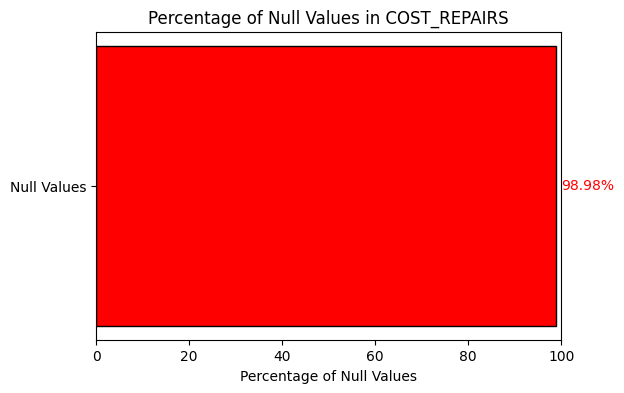

In [125]:
# Select the column for which you want to calculate the percentage of null values
column_name = 'COST_REPAIRS'

# Calculate the percentage of null values in the selected column
null_percentage = (y_cost[column_name].isnull().sum() / len(df)) * 100

# Create a bar plot to display the percentage of null values
plt.figure(figsize=(6, 4))
plt.barh(['Null Values'], [null_percentage], color='red', edgecolor='black')
plt.xlim(0, 100)
plt.xlabel('Percentage of Null Values')
plt.title(f'Percentage of Null Values in {column_name}')
plt.text(null_percentage + 1, 0, f'{null_percentage:.2f}%', va='center', color='red')
plt.show()

#### Percentage of Null values

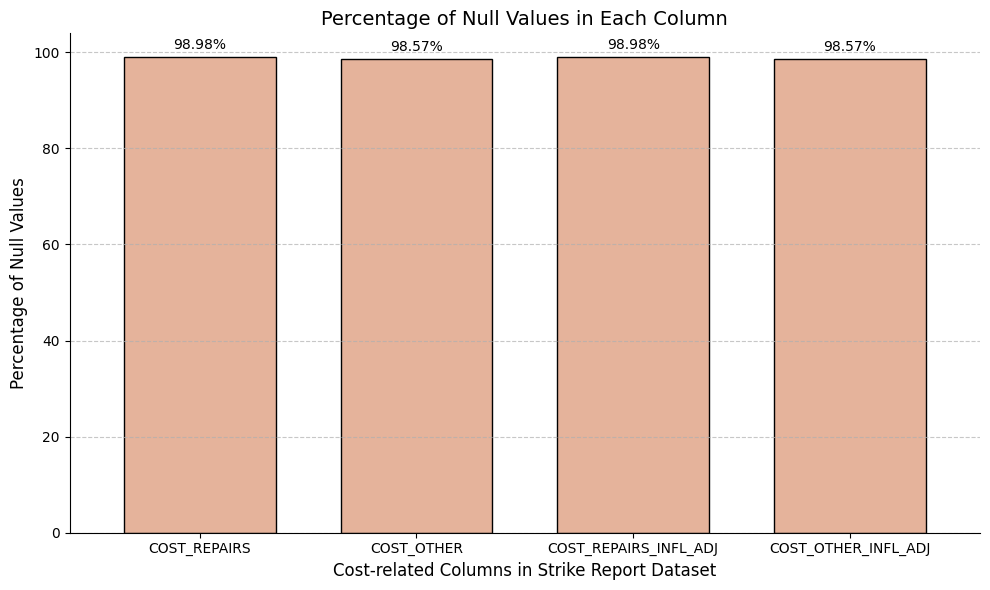

In [126]:
# Calculate the percentage of null values for each column
null_percentage = (y_cost.isnull().sum() / len(df)) * 100

# Create a bar plot to display the percentage of null values for each column
plt.figure(figsize=(10, 6))
ax = null_percentage.plot(kind='bar', color='#E5B39B', edgecolor='black', width=0.7)

# Adding labels and titles
plt.xlabel('Cost-related Columns in Strike Report Dataset', fontsize=12)
plt.ylabel('Percentage of Null Values', fontsize=12)
plt.title('Percentage of Null Values in Each Column', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels on top of the bars
for i, v in enumerate(null_percentage):
    plt.text(i, v + 1, f'{v:0.2f}%', ha='center', va='bottom', fontsize=10)

# Customizing the appearance
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

#### Non null values in cost repairs

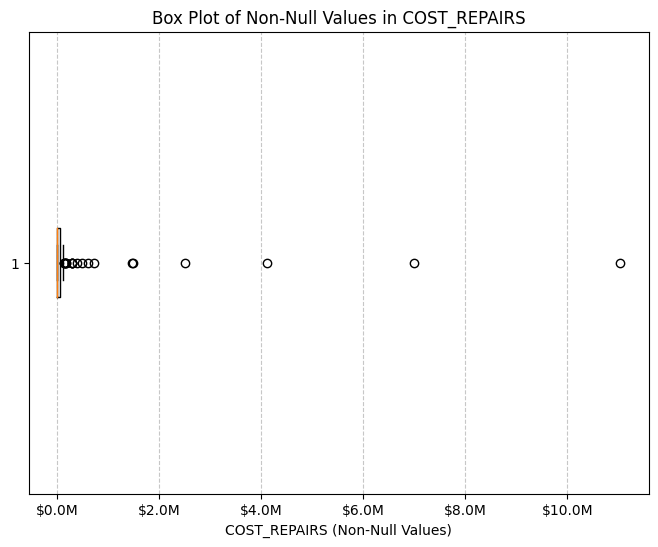

In [127]:
# Select the 'COST_REPAIRS' column and drop the null values
cost_repairs_non_null = y_cost['COST_REPAIRS'].dropna()

from matplotlib.ticker import FuncFormatter
# Create a box plot to visualize the distribution of non-null values
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_non_null, vert=False)
plt.xlabel('COST_REPAIRS (Non-Null Values)')
plt.title('Box Plot of Non-Null Values in COST_REPAIRS')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

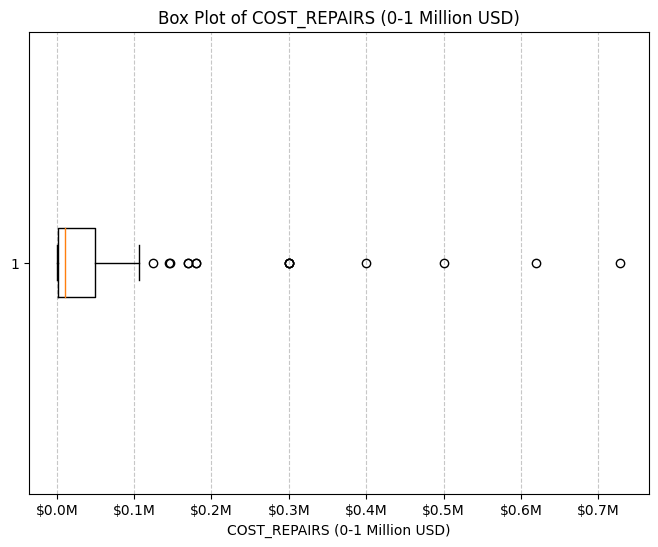

In [128]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_REPAIRS'][(y_cost['COST_REPAIRS'] >= 0) & (y_cost['COST_REPAIRS'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_REPAIRS (0-1 Million USD)')
plt.title('Box Plot of COST_REPAIRS (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

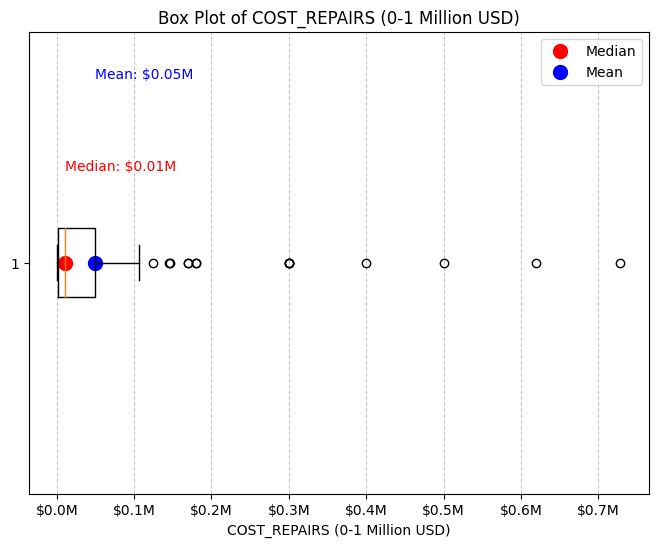

In [129]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_REPAIRS'][(y_cost['COST_REPAIRS'] >= 0) & (y_cost['COST_REPAIRS'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_REPAIRS (0-1 Million USD)')
plt.title('Box Plot of COST_REPAIRS (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate the median and mean
median_value = cost_repairs_filtered.median()
mean_value = cost_repairs_filtered.mean()

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the median value as a red dot on the plot and label it
plt.scatter(median_value, 1, color='red', marker='o', s=100, label='Median')
plt.annotate(f'Median: ${median_value/1e6:.2f}M', (median_value, 1.2), color='red')

# Display the mean value as a blue dot on the plot and label it
plt.scatter(mean_value, 1, color='blue', marker='o', s=100, label='Mean')
plt.annotate(f'Mean: ${mean_value/1e6:.2f}M', (mean_value, 1.4), color='blue')

# Add a legend
plt.legend()

plt.show()

#### Non null values in Cost Other

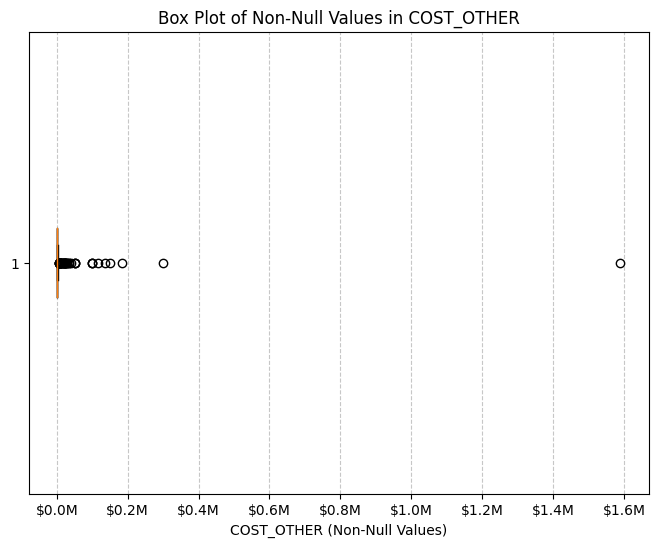

In [130]:
# Select the 'COST_REPAIRS' column and drop the null values
cost_repairs_non_null = y_cost['COST_OTHER'].dropna()

from matplotlib.ticker import FuncFormatter
# Create a box plot to visualize the distribution of non-null values
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_non_null, vert=False)
plt.xlabel('COST_OTHER (Non-Null Values)')
plt.title('Box Plot of Non-Null Values in COST_OTHER')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

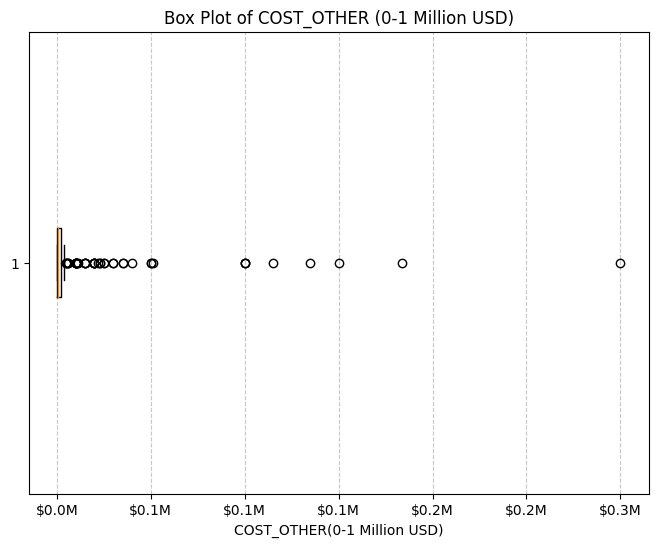

In [131]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_OTHER'][(y_cost['COST_OTHER'] >= 0) & (y_cost['COST_OTHER'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_OTHER(0-1 Million USD)')
plt.title('Box Plot of COST_OTHER (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

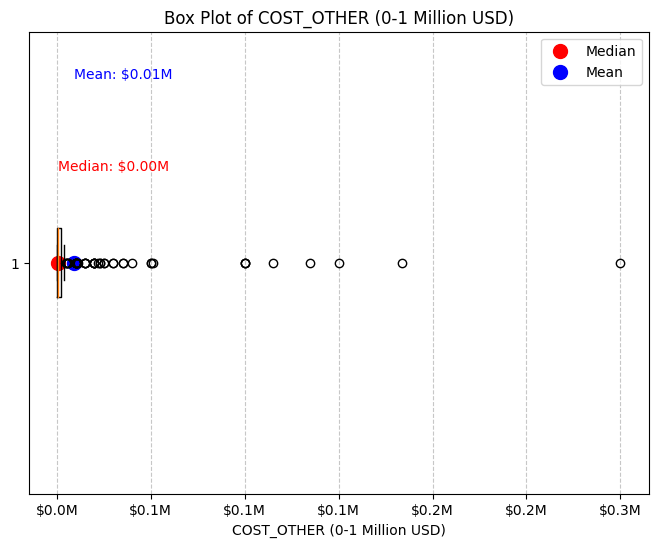

In [132]:
# Filter the 'COST_REPAIRS' column to include only values between 0 and 1 million dollars
cost_repairs_filtered = y_cost['COST_OTHER'][(y_cost['COST_OTHER'] >= 0) & (y_cost['COST_OTHER'] <= 1000000)]

# Create a box plot for the filtered data
plt.figure(figsize=(8, 6))
plt.boxplot(cost_repairs_filtered, vert=False)
plt.xlabel('COST_OTHER (0-1 Million USD)')
plt.title('Box Plot of COST_OTHER (0-1 Million USD)')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Calculate the median and mean
median_value = cost_repairs_filtered.median()
mean_value = cost_repairs_filtered.mean()

# Format x-axis labels to display values in dollars
def dollar_formatter(x, pos):
    return f'${x/1e6:.1f}M'

formatter = FuncFormatter(dollar_formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Display the median value as a red dot on the plot and label it
plt.scatter(median_value, 1, color='red', marker='o', s=100, label='Median')
plt.annotate(f'Median: ${median_value/1e6:.2f}M', (median_value, 1.2), color='red')

# Display the mean value as a blue dot on the plot and label it
plt.scatter(mean_value, 1, color='blue', marker='o', s=100, label='Mean')
plt.annotate(f'Mean: ${mean_value/1e6:.2f}M', (mean_value, 1.4), color='blue')

# Add a legend
plt.legend()

plt.show()


### Cost Analysis: Ranges

In [133]:
y_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   COST_REPAIRS           159 non-null    float64
 1   COST_OTHER             223 non-null    float64
 2   COST_REPAIRS_INFL_ADJ  159 non-null    float64
 3   COST_OTHER_INFL_ADJ    223 non-null    float64
dtypes: float64(4)
memory usage: 488.8 KB


#### Read DAMAGE LEVEL & COSTs

In [134]:
damage_cost = df.loc[:, ['DAMAGE_LEVEL', 'COST_REPAIRS', 'COST_OTHER']]

In [135]:
damage_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAMAGE_LEVEL  15638 non-null  int64  
 1   COST_REPAIRS  159 non-null    float64
 2   COST_OTHER    223 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 366.6 KB


#### Filter Non-null values

In [136]:
other_not_na = damage_cost.loc[(damage_cost['COST_OTHER'].notna())]
other_not_na.head()

,DAMAGE_LEVEL,COST_REPAIRS,COST_OTHER
89,2,NaN,100.00
166,0,NaN,1600.00
276,0,NaN,20.00
367,2,100000.00,25000.00
561,2,400000.00,300000.00


In [137]:
other_not_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 89 to 15637
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAMAGE_LEVEL  223 non-null    int64  
 1   COST_REPAIRS  64 non-null     float64
 2   COST_OTHER    223 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.0 KB


In [138]:
repairs_not_na = damage_cost.loc[(damage_cost['COST_REPAIRS'].notna())]
repairs_not_na.head()

,DAMAGE_LEVEL,COST_REPAIRS,COST_OTHER
13,2,1700.00,NaN
107,2,43440.00,NaN
130,1,700.00,NaN
135,2,60000.00,NaN
367,2,100000.00,25000.00


In [139]:
repairs_not_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 13 to 15637
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAMAGE_LEVEL  159 non-null    int64  
 1   COST_REPAIRS  159 non-null    float64
 2   COST_OTHER    64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 5.0 KB


#### Outliers in Cost repairs

In [140]:
damage_cost['COST_REPAIRS'].describe()

count        159.00
mean      221632.92
std      1105079.67
min            1.00
25%         2310.50
50%        13965.00
75%        53442.50
max     11041786.00
Name: COST_REPAIRS, dtype: float64

Comment: Looking at the summary statistics of Cost Repairs column. It is evident that outliers are present.

In [141]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].mean()

DAMAGE_LEVEL
0      1566.69
1      4403.80
2    148253.41
3   1643822.73
4          NaN
5          NaN
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the mean value of cost repairs in each level

In [142]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].min()

DAMAGE_LEVEL
0      1.00
1     28.00
2     70.00
3   3000.00
4       NaN
5       NaN
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the minimum value of cost repairs in each level

In [143]:
damage_cost.groupby('DAMAGE_LEVEL')['COST_REPAIRS'].max()

DAMAGE_LEVEL
0      15000.00
1      40000.00
2    7000000.00
3   11041786.00
4           NaN
5           NaN
Name: COST_REPAIRS, dtype: float64

Comment: Grouping the damage level and looking at the max value of cost repairs in each level

<Axes: >

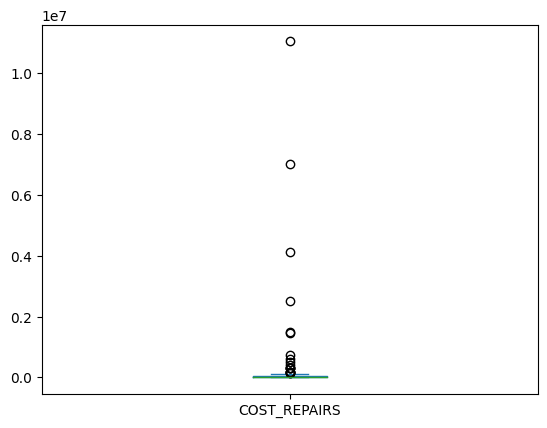

In [144]:
damage_cost['COST_REPAIRS'].plot(kind='box')

<Axes: >

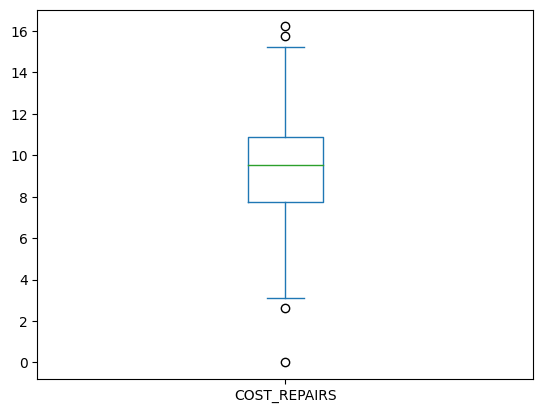

In [145]:
# 2. Log Transformation
np.log(damage_cost['COST_REPAIRS']).plot(kind="box")

Comment: Since there are outliers in the cost repairs column, by applying log transformation on the column, it looks better now

In [146]:
# 1. Outlier Detection and Handling (using IQR)
Q1 = damage_cost['COST_REPAIRS'].quantile(0.25)
Q3 = damage_cost['COST_REPAIRS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [147]:
print(lower_bound, ',', upper_bound)

-74387.5 , 130140.5


<Axes: >

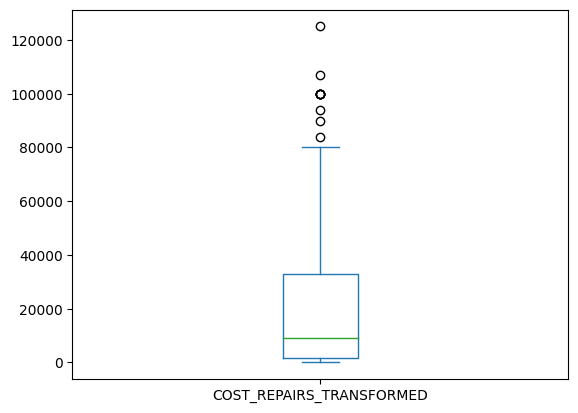

In [148]:
damage_cost['COST_REPAIRS_TRANSFORMED'] = damage_cost[(damage_cost['COST_REPAIRS'] >= lower_bound) & (damage_cost['COST_REPAIRS'] <= upper_bound)]['COST_REPAIRS']
damage_cost['COST_REPAIRS_TRANSFORMED'].plot(kind='box')

#### Distribution of cost in each level with Outliers

In [149]:
# Get unique damage level classes
damage_levels = damage_cost['DAMAGE_LEVEL'].dropna().unique()

In [150]:
damage_levels

array([5, 0, 2, 1, 3, 4])

In [151]:
damage_cost['COST_REPAIRS'].fillna(0, inplace=True)

<Axes: >

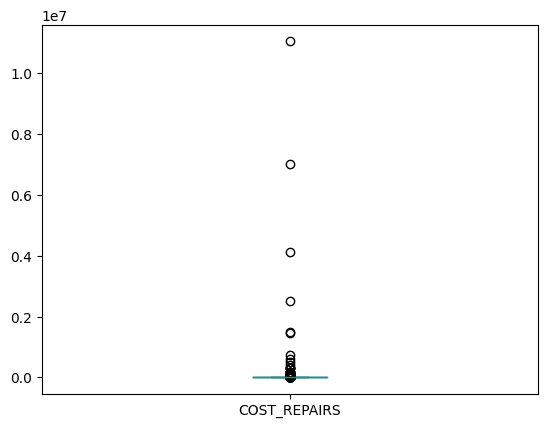

In [152]:
damage_cost['COST_REPAIRS'].plot(kind='box')

In [153]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_range = (subset['COST_REPAIRS'].min(), subset['COST_REPAIRS'].max())
    ranges[level] = cost_range

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 5, Cost Range: (0.0, 0.0)
Damage Level: 0, Cost Range: (0.0, 15000.0)
Damage Level: 2, Cost Range: (0.0, 7000000.0)
Damage Level: 1, Cost Range: (0.0, 40000.0)
Damage Level: 3, Cost Range: (0.0, 11041786.0)
Damage Level: 4, Cost Range: (0.0, 0.0)


In [154]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    iqr = np.percentile(subset['COST_REPAIRS'], 75) - np.percentile(subset['COST_REPAIRS'], 25)
    print(f'Damage Level: {level}, IQR: {iqr}')

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 5, IQR: 0.0
Damage Level: 0, IQR: 0.0
Damage Level: 2, IQR: 0.0
Damage Level: 1, IQR: 0.0
Damage Level: 3, IQR: 8500.0
Damage Level: 4, IQR: 0.0


In [155]:
import scipy.stats as stats

In [156]:
# Calculate and print the 95% confidence interval for each class
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_values = subset['COST_REPAIRS']
    confidence_interval = stats.t.interval(0.95, len(cost_values) - 1, loc=cost_values.mean(), scale=stats.sem(cost_values))
    rounded_interval = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))
    print(f'Damage Level: {level}, 95% Confidence Interval: {rounded_interval}')

Damage Level: 5, 95% Confidence Interval: (nan, nan)
Damage Level: 0, 95% Confidence Interval: (-1.18, 6.27)
Damage Level: 2, 95% Confidence Interval: (4620.8, 58641.32)
Damage Level: 1, 95% Confidence Interval: (20.09, 1853.87)
Damage Level: 3, 95% Confidence Interval: (-194372.95, 1360956.82)
Damage Level: 4, 95% Confidence Interval: (nan, nan)


#### Distribution of cost in each level without Outliers

In [157]:
# Get unique damage level classes
damage_levels = damage_cost['DAMAGE_LEVEL'].dropna().unique()

In [158]:
damage_levels

array([5, 0, 2, 1, 3, 4])

In [159]:
damage_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DAMAGE_LEVEL              15638 non-null  int64  
 1   COST_REPAIRS              15638 non-null  float64
 2   COST_OTHER                223 non-null    float64
 3   COST_REPAIRS_TRANSFORMED  139 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 488.8 KB


In [160]:
damage_cost['COST_REPAIRS_TRANSFORMED'].fillna(0, inplace=True)

<Axes: >

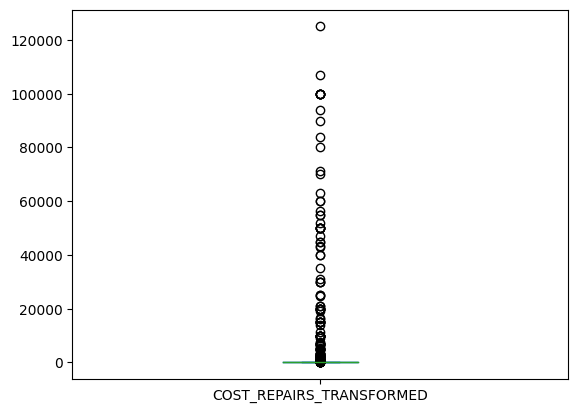

In [161]:
damage_cost['COST_REPAIRS_TRANSFORMED'].plot(kind='box')

In [162]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_range = (subset['COST_REPAIRS_TRANSFORMED'].min(), subset['COST_REPAIRS_TRANSFORMED'].max())
    ranges[level] = cost_range

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 5, Cost Range: (0.0, 0.0)
Damage Level: 0, Cost Range: (0.0, 15000.0)
Damage Level: 2, Cost Range: (0.0, 125000.0)
Damage Level: 1, Cost Range: (0.0, 40000.0)
Damage Level: 3, Cost Range: (0.0, 40000.0)
Damage Level: 4, Cost Range: (0.0, 0.0)


In [163]:
# Calculate ranges for each damage level
ranges = {}
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    iqr = np.percentile(subset['COST_REPAIRS_TRANSFORMED'], 75) - np.percentile(subset['COST_REPAIRS_TRANSFORMED'], 25)
    print(f'Damage Level: {level}, IQR: {iqr}')

# Print the ranges
for level, cost_range in ranges.items():
    print(f'Damage Level: {level}, Cost Range: {cost_range}')

Damage Level: 5, IQR: 0.0
Damage Level: 0, IQR: 0.0
Damage Level: 2, IQR: 0.0
Damage Level: 1, IQR: 0.0
Damage Level: 3, IQR: 0.0
Damage Level: 4, IQR: 0.0


In [164]:
import scipy.stats as stats

In [165]:
# Calculate and print the 95% confidence interval for each class
for level in damage_levels:
    subset = damage_cost[damage_cost['DAMAGE_LEVEL'] == level]
    cost_values = subset['COST_REPAIRS_TRANSFORMED']
    confidence_interval = stats.t.interval(0.95, len(cost_values) - 1, loc=cost_values.mean(), scale=stats.sem(cost_values))
    rounded_interval = (round(confidence_interval[0], 2), round(confidence_interval[1], 2))
    print(f'Damage Level: {level}, 95% Confidence Interval: {rounded_interval}')

Damage Level: 5, 95% Confidence Interval: (nan, nan)
Damage Level: 0, 95% Confidence Interval: (-1.18, 6.27)
Damage Level: 2, 95% Confidence Interval: (3935.29, 6965.14)
Damage Level: 1, 95% Confidence Interval: (20.09, 1853.87)
Damage Level: 3, 95% Confidence Interval: (30.01, 6002.25)
Damage Level: 4, 95% Confidence Interval: (nan, nan)


#### Assign cost ranges for each level